# Cell Co-occurrence

Cell co-occurrence refers to the occurrence, spatial relationship, of two or more cell types in close proximity in the same tissue region. The algorithm aims to identify and quantify the interactions or associations between different cell types in order to understand their spatial organization and potential functional relationships.

## Clustering on Cells

Download [example data](http://116.6.21.110:8090/share/dd965cba-7c1f-40b2-a275-0150890e005f), and complete basic analysis processing.

In [2]:
import stereo as st

# reading data
input_file = "/home/projects/data/SS200000135TL_D1.cellbin.gef"
data = st.io.read_gef(input_file, bin_type='cell_bins')

# preprocessing
data.tl.cal_qc()
data.tl.filter_cells(min_gene=200, min_n_genes_by_counts=3, max_n_genes_by_counts=2500, pct_counts_mt=5, inplace=True)
data.tl.raw_checkpoint()
data.tl.normalize_total()
data.tl.log1p()

# clustering
data.tl.pca(use_highly_genes=False, n_pcs=50)
data.tl.neighbors(pca_res_key='pca')
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

[2023-07-24 10:17:40][Stereo][666][MainThread][140452226090816][reader][1012][INFO]: read_gef begin ...
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1049][INFO]: the matrix has 57133 cells, and 24670 genes.
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1172][INFO]: This is GEF file which contains cell bin infomation.
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1173][INFO]: bin_type: cell_bins
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1179][INFO]: Number of cells: 57133
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1182][INFO]: Number of gene: 24670
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1185][INFO]: Resolution: 500
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1188][INFO]: offsetX: 0
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][reader][1191][INFO]: offsetY: 0
[2023-07-24 10:

Show the distribution of clusters.

[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][st_pipeline][37][INFO]: start to run normalize_total...
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][st_pipeline][40][INFO]: normalize_total end, consume time 0.0793s.
[2023-07-24 10:17:43][Stereo][666][MainThread][140452226090816][st_pipeline][37][INFO]: start to run log1p...
[2023-07-24 10:17:44][Stereo][666][MainThread][140452226090816][st_pipeline][40][INFO]: log1p end, consume time 0.1347s.
[2023-07-24 10:17:44][Stereo][666][MainThread][140452226090816][st_pipeline][37][INFO]: start to run pca...
[2023-07-24 10:17:44][Stereo][666][MainThread][140452226090816][dim_reduce][77][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2023-07-24 10:18:07][Stereo][666][MainThread][140452226090816][st_pipeline][40][INFO]: pca end, consume time 23.7529s.
[2023-07-24 10:18:07][Stereo][666][MainThread][140452226090816][st_pipeline][37][INFO]: start to run neighbors..

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

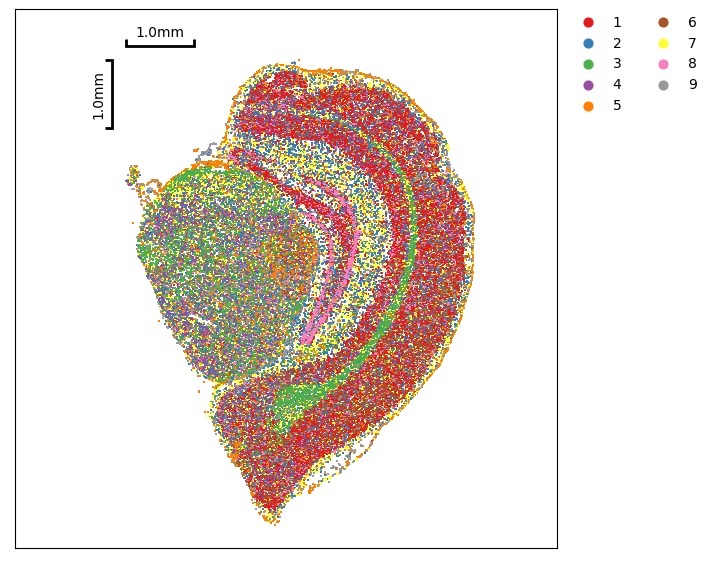

In [3]:
data.plt.cluster_scatter(res_key='leiden')

## Co-occurrence Analysis

Here provides two method for calculate co-occurence, `'squidpy'` for method in Squidpy, `'stereopy'` for method in Stereopy by default.

In [4]:
data.tl.co_occurrence(
        method='stereopy',
        cluster_res_key='leiden', 
        res_key='co_occurrence',
        dist_thres=300, # max threshold to measure co-occurence
        steps=10,  # step numbers to divide threshold interval evenly
        genelist=None,
        gene_thresh=0, # min threshold for gene expression in a cell
        n_jobs=-1
        )

[2023-07-24 10:19:41][Stereo][666][MainThread][140452226090816][st_pipeline][71][INFO]: register algorithm co_occurrence to <stereo.core.st_pipeline.StPipeline object at 0x7fbd34e9b130>


StereoExpData object with n_cells X n_genes = 57133 X 24670
bin_type: cell_bins
offset_x = None
offset_y = None
cells: ['cell_name', 'leiden']
genes: ['gene_name']
cells_matrix = ['pca']
cells_pairwise = ['neighbors']
key_record: {'pca': ['pca'], 'neighbors': ['neighbors'], 'cluster': ['leiden'], 'gene_exp_cluster': ['gene_exp_leiden'], 'co_occurrence': ['co_occurrence']}

Each plot represents, along with the increase of distance, the probability of co-occurrence between the cluster in title and other clusters.

<div class="alert alert-info">

**Note**

Each mark on x-axis represents a distance interval but not a single value. For example, 50 means the interval from 0 to 50 while 100 is from 50 to 100 and so on.

</div>

[2023-07-24 10:21:48][Stereo][666][MainThread][140452226090816][plot_collection][57][INFO]: register plot_func co_occurrence_plot to <stereo.plots.plot_collection.PlotCollection object at 0x7fbc9cab1be0>


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

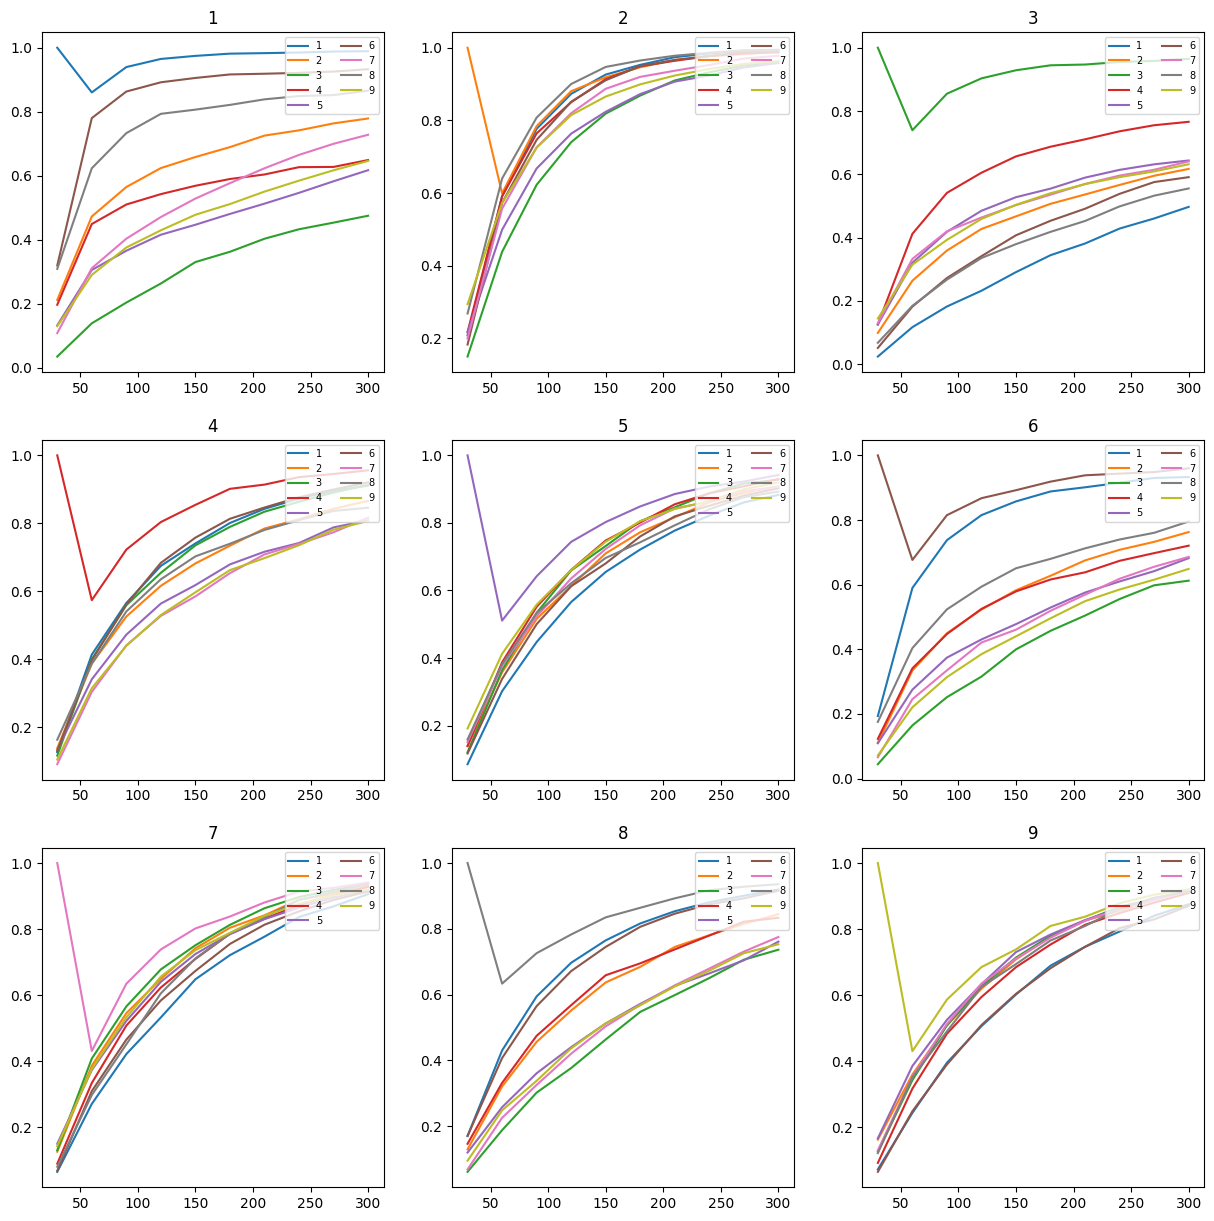

In [5]:
data.plt.co_occurrence_plot(res_key='co_occurrence')

Each heatmap represents, under different distance interval in title, the probability of co-occurrence between each clusters.

<div class="alert alert-info">

**Note**
    
Similar to the plots above, the values in title represent a distance interval, for example, 30 is the interval from 0 to 30 while 60 is from 30 to 60 and so on.

</div>

[2023-07-24 10:21:49][Stereo][666][MainThread][140452226090816][plot_collection][57][INFO]: register plot_func co_occurrence_heatmap to <stereo.plots.plot_collection.PlotCollection object at 0x7fbc9cab1be0>


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

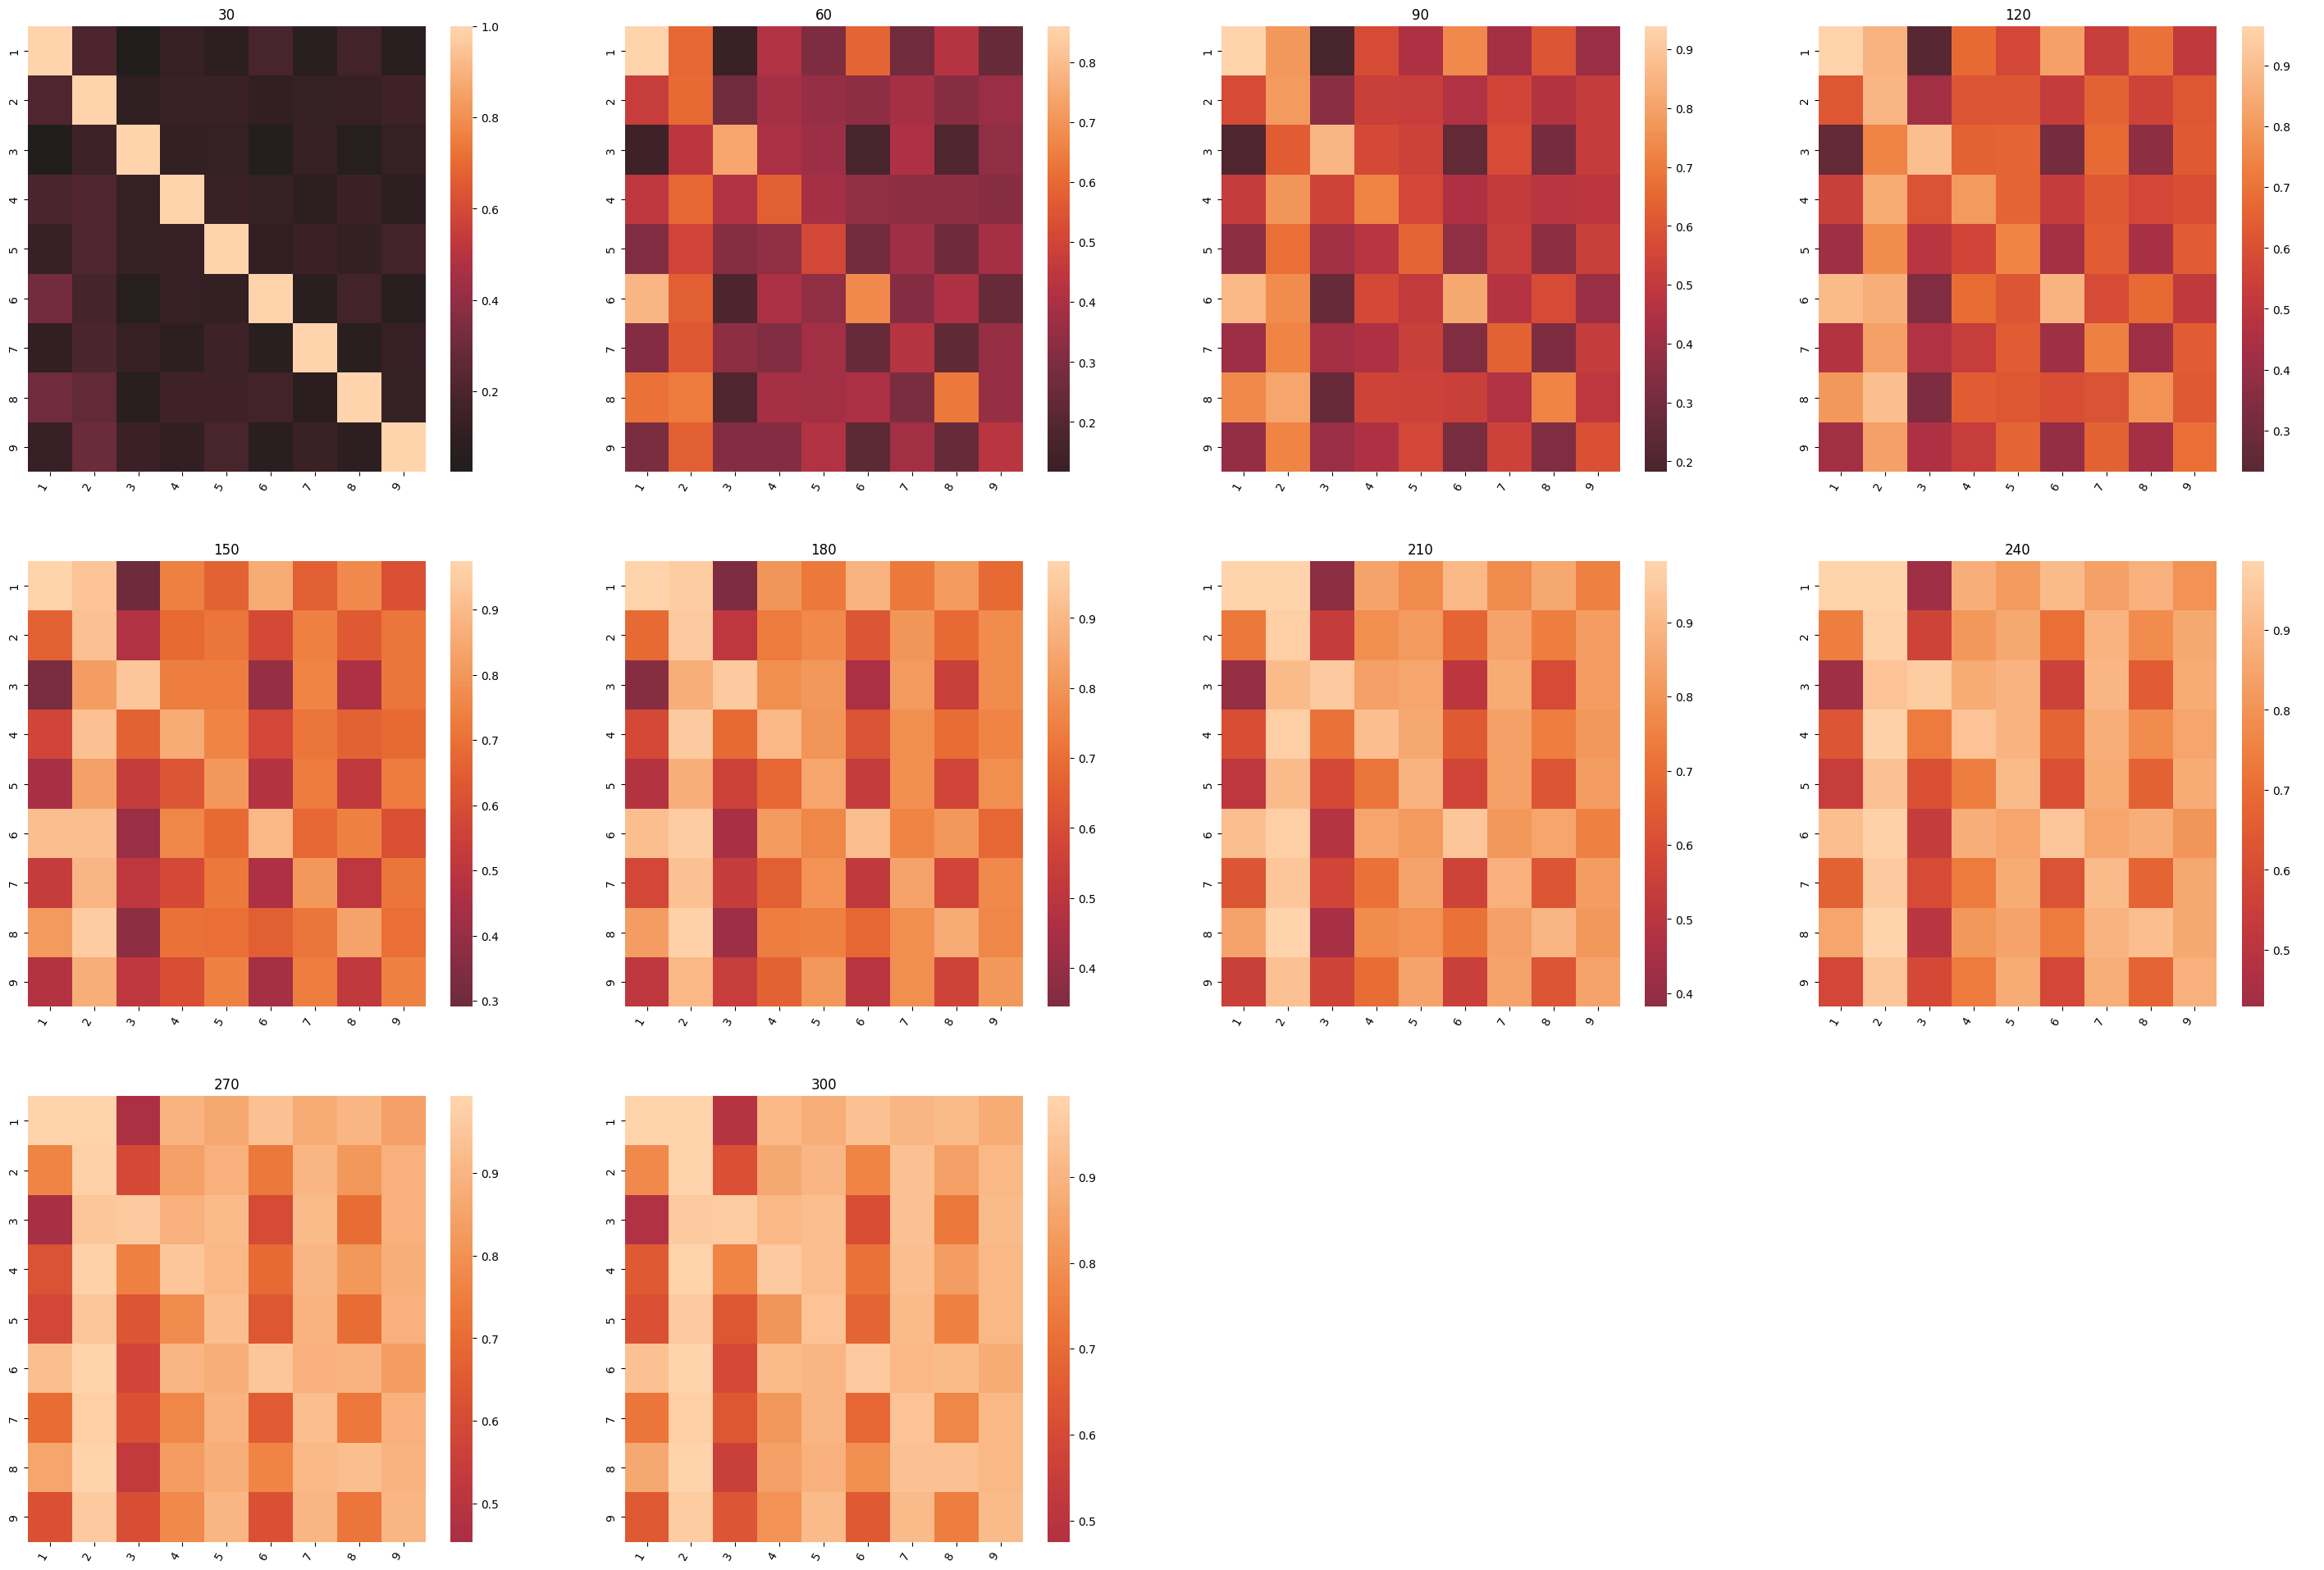

In [6]:
data.plt.co_occurrence_heatmap(res_key='co_occurrence', cluster_res_key='leiden')